In [1]:
import matplotlib.pyplot as plt
from plots.mpltoolkit import mpl_loc, named_colors, fancy_legend, markers, load_mpl_presets
import numpy as np
import math as m
import vice
import sys
load_mpl_presets()
print(sys.version_info)
sys.path.append("..")
import src

/Users/astrobeard/Work/Research/VICErepos/VICE/vice/__init__.py:141: UserWarning: Using un-released version of VICE
  warnings.warn("Using un-released version of VICE", UserWarning)


sys.version_info(major=3, minor=10, micro=2, releaselevel='final', serial=0)


In [6]:
path = "/Volumes/Elements/bimodality-outputs/clumpy-bursts/post-process"
name = "%s/onset2_dur1_5_0p5" % (path)
output = vice.output(name)
extra = np.genfromtxt("%s_analogdata.out" % (output.name))
output.stars["abszfinal"] = [abs(row[-1]) for row in extra[:output.stars.size[0]]]

/var/folders/1p/lm_h7y810f9_7ygnvr2tjc_w0000gn/T/ipykernel_12948/1939376777.py:66: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


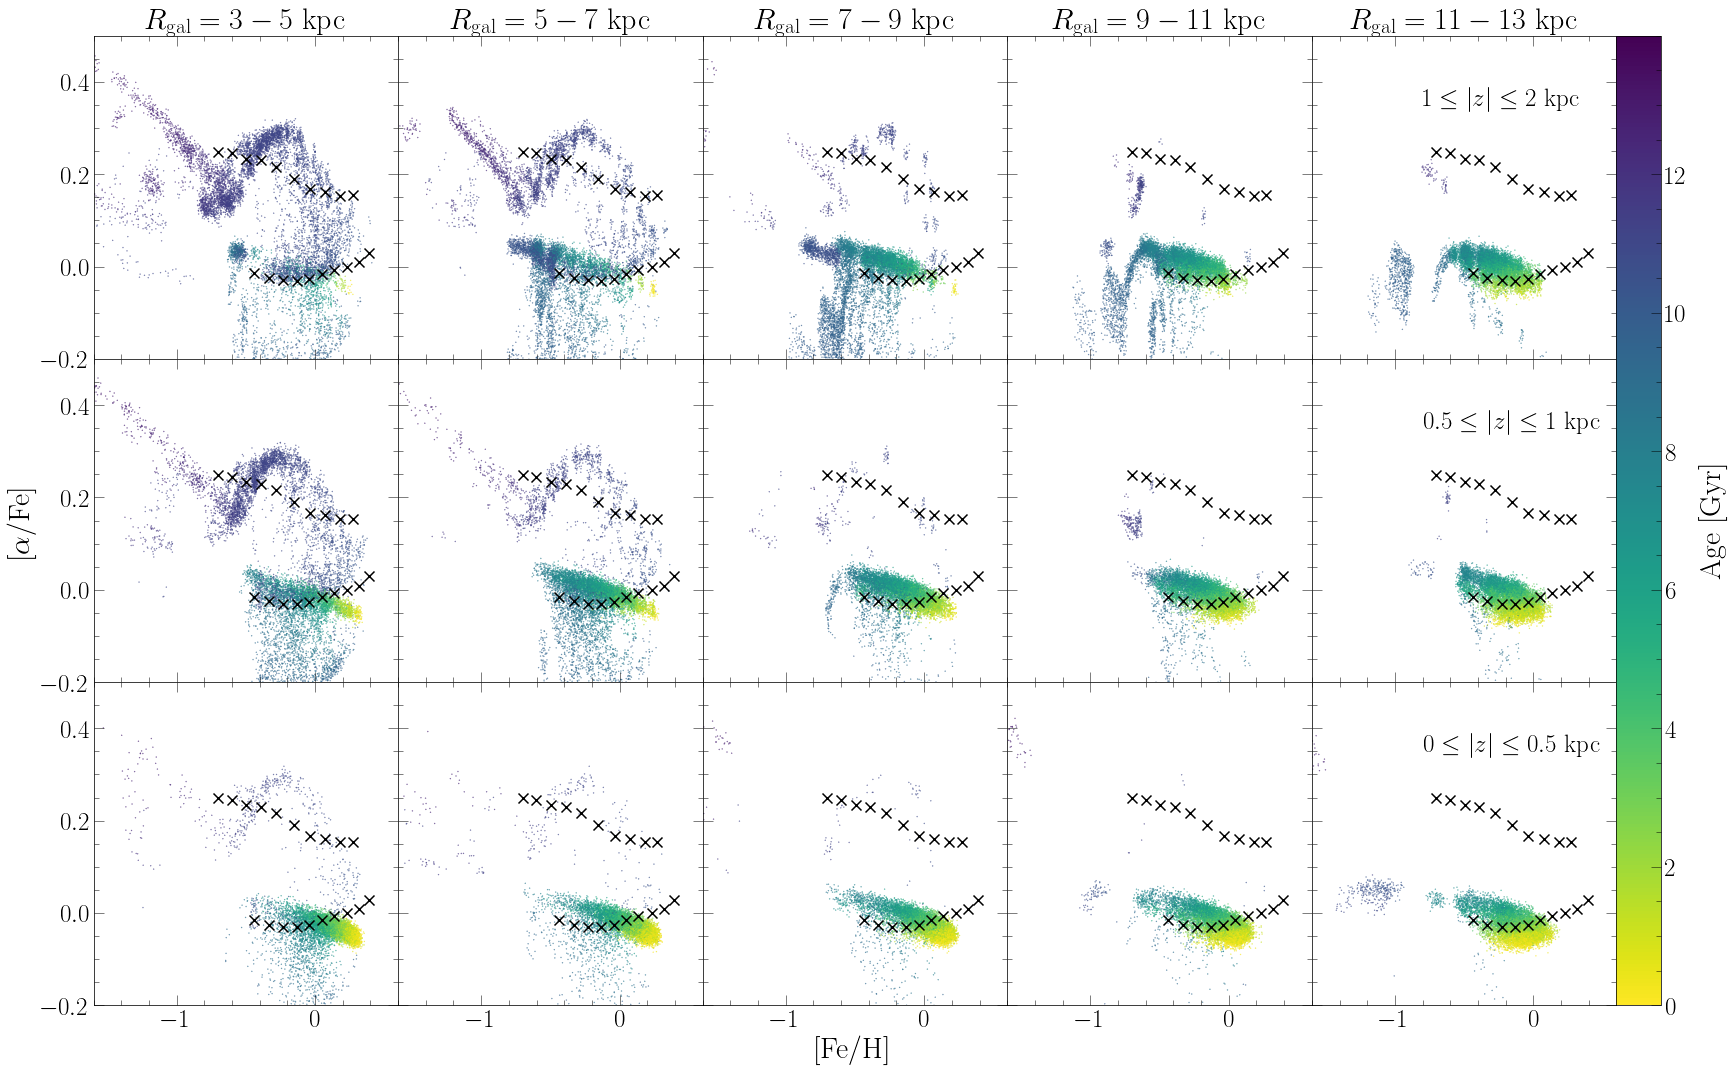

In [11]:
radbins = [[3, 5], [5, 7], [7, 9], [9, 11], [11, 13]]
zbins = [[1, 2], [0.5, 1], [0, 0.5]]
zonewidth = 0.1

fig, axes = plt.subplots(ncols = 5, nrows = 3, figsize = (25, 15))
axes[1][0].set_ylabel(r"[$\alpha$/Fe]", fontsize = 30)
axes[2][2].set_xlabel("[Fe/H]", fontsize = 30)
for i in range(len(axes)):
    for j in range(len(axes[i])):
        if j: plt.setp(axes[i][j].get_yticklabels(), visible = False)
        axes[i][j].set_xlim([-1.6, 0.6])
        axes[i][j].set_ylim([-0.2, 0.5])
        axes[i][j].tick_params(which = "both", labelsize = 25)
        if not i: axes[i][j].set_title(
            r"$R_\text{gal} = %g - %g$ kpc" % (radbins[j][0], radbins[j][1]), fontsize = 30)
        if j == len(axes[i]) - 1: axes[i][j].text(-0.8, 0.35, r"$%g \leq \left|z\right| \leq %g$ kpc" % (
            zbins[i][0], zbins[i][1]), fontsize = 25)

for i in range(len(zbins)):
    for j in range(len(radbins)):
# for i in range(1):
#     for j in range(1):
        stars = output.stars.filter(
            "zone_final", ">=", radbins[j][0] // zonewidth).filter(
            "zone_final", "<=", radbins[j][1] // zonewidth).filter(
            "abszfinal", ">=", zbins[i][0]).filter(
            "abszfinal", "<=", zbins[i][1])
        np.random.seed(seed = 0)
        mtot = sum(stars["mass"])
        mass_fracs = [_ / mtot for _ in stars["mass"]]
        indeces = np.random.choice(list(range(len(stars["mass"]))), p = mass_fracs, size = 10000)
        xvals = [stars["[fe/h]"][_] for _ in indeces]
        yvals = [stars["[o/fe]"][_] for _ in indeces]
        age = [stars["age"][_] for _ in indeces]
        for k in range(len(xvals)):
            xvals[k] += np.random.normal(scale = 0.01)
            yvals[k] += np.random.normal(scale = 0.01)
        kwargs = {
            "c": age,
            "s": 0.1,
            "rasterized": True,
            "cmap": plt.get_cmap("viridis_r"),
            "vmin": 0,
            "vmax": 14
        }
        sc = axes[i][j].scatter(xvals, yvals, **kwargs)
        
higha, lowa = src.data.griffith2021()
kwargs = {
    "c": named_colors()["black"],
    "marker": markers()['x'],
    "zorder": 10,
    "s": 100
}
for i in range(len(zbins)):
    for j in range(len(radbins)):
        axes[i][j].scatter(higha["[fe/h]"], higha["[o/fe]"], **kwargs)
        axes[i][j].scatter(lowa["[fe/h]"], lowa["[o/fe]"], **kwargs)
        
cbar_ax = fig.add_axes([0.92, 0.05, 0.02, 0.95])
cbar = plt.colorbar(sc, cax = cbar_ax, pad = 0, orientation = "vertical")
cbar.set_label("Age [Gyr]", labelpad = 10, fontsize = 30)
cbar.set_ticks(range(0, 14, 2))
cbar.ax.tick_params(labelsize = 25)

plt.tight_layout()
plt.subplots_adjust(wspace = 0, hspace = 0, right = 0.9)
cbar_ax.set_position([
    axes[-1][-1].get_position().x1,
    axes[-1][-1].get_position().y0,
    0.025,
    axes[0][-1].get_position().y1 - axes[-1][-1].get_position().y0
])
# for ext in ["pdf", "png"]: plt.savefig("./ofe_feh_densitymap/ratiotest.%s" % (ext))
plt.show()